In [19]:
# Astropy is 
from astropy.io import fits

# Numpy is a powerful package for numerical analysis.
import numpy as np

# Matplotlib is the most popular Python plotting package.
import matplotlib.pyplot as plt

from astropy.modeling.models import Moffat1D
from scipy.signal import peak_widths
import glob
import pandas as pd
import astropy
from astropy.nddata import CCDData
import photutils

import photutils
from photutils import IterativelySubtractedPSFPhotometry, aperture_photometry
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
import astropy.units as u

ModuleNotFoundError: No module named 'photutils'

In [15]:
import photutils

ModuleNotFoundError: No module named 'photutils'

In [16]:
image =  CCDData.read('object_032.fits', unit='adu')

#print(image.shape)
#print(image)

a floating-point value was expected. [astropy.wcs.wcs]


In [17]:
mean, median, std = astropy.stats.sigma_clipped_stats(image.data)

AttributeError: module 'astropy' has no attribute 'stats'

In [18]:
DAO = photutils.detection.DAOStarFinder(threshold = 8 * std, fwhm = 3.0)
sources = DAO(image.data - median)

NameError: name 'photutils' is not defined

In [5]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,485.27144068913924,184.04920943170603,0.45399153354626637,0.004711887695620945,-0.4426092977688513,25,0.0,1084.0,1.080201152914467,-0.08376159118566393
2,73.14225484406066,195.8031499576572,0.4348921506300603,-0.009414510204709207,-0.04138437470153625,25,0.0,2030.0,2.047052664092236,-0.7778225395219727
3,323.1551395775673,200.88396324119472,0.4155852441768097,0.05001820667508666,-0.05932319731118206,25,0.0,36345.0,38.78931949737506,-3.97178040149258
4,179.30678778959773,220.15819627861612,0.3863504044516597,0.06530079749853059,-0.06886574178907945,25,0.0,58902.0,53.96211384626207,-4.330222384643201
5,179.07884072401322,220.24776728560997,0.495626859648139,0.02247030042168399,-0.1882812710577204,25,0.0,57233.0,48.23703579753762,-4.208451530566258
6,111.46956405683571,352.92750378151607,0.4102504691093896,-0.006178124485743875,-0.16547490787816158,25,0.0,2398.0,2.4530042297974837,-0.9742457426889393
7,483.00167760703187,388.5668191162266,0.9317297347354075,0.2354398435714515,0.44004175109151605,25,0.0,4899.0,8.842863717809863,-2.366482329794635
8,122.47288538848906,466.09375592151923,0.9683930130726102,0.060612483320196586,-0.2910913099745603,25,0.0,1065.0,1.8702576151963775,-0.6797535793793166
9,339.8875650987351,510.18763973335774,0.3319233366415628,-0.5720211118573858,-0.8763944134313212,25,0.0,928.0,1.5184966075922683,-0.45353456504202555


In [6]:
source_points = np.array([sources['xcentroid'], sources['ycentroid']])

In [330]:
positions = np.transpose(source_points)

apertures = photutils.CircularAperture(positions, r=10.)

NameError: name 'image' is not defined

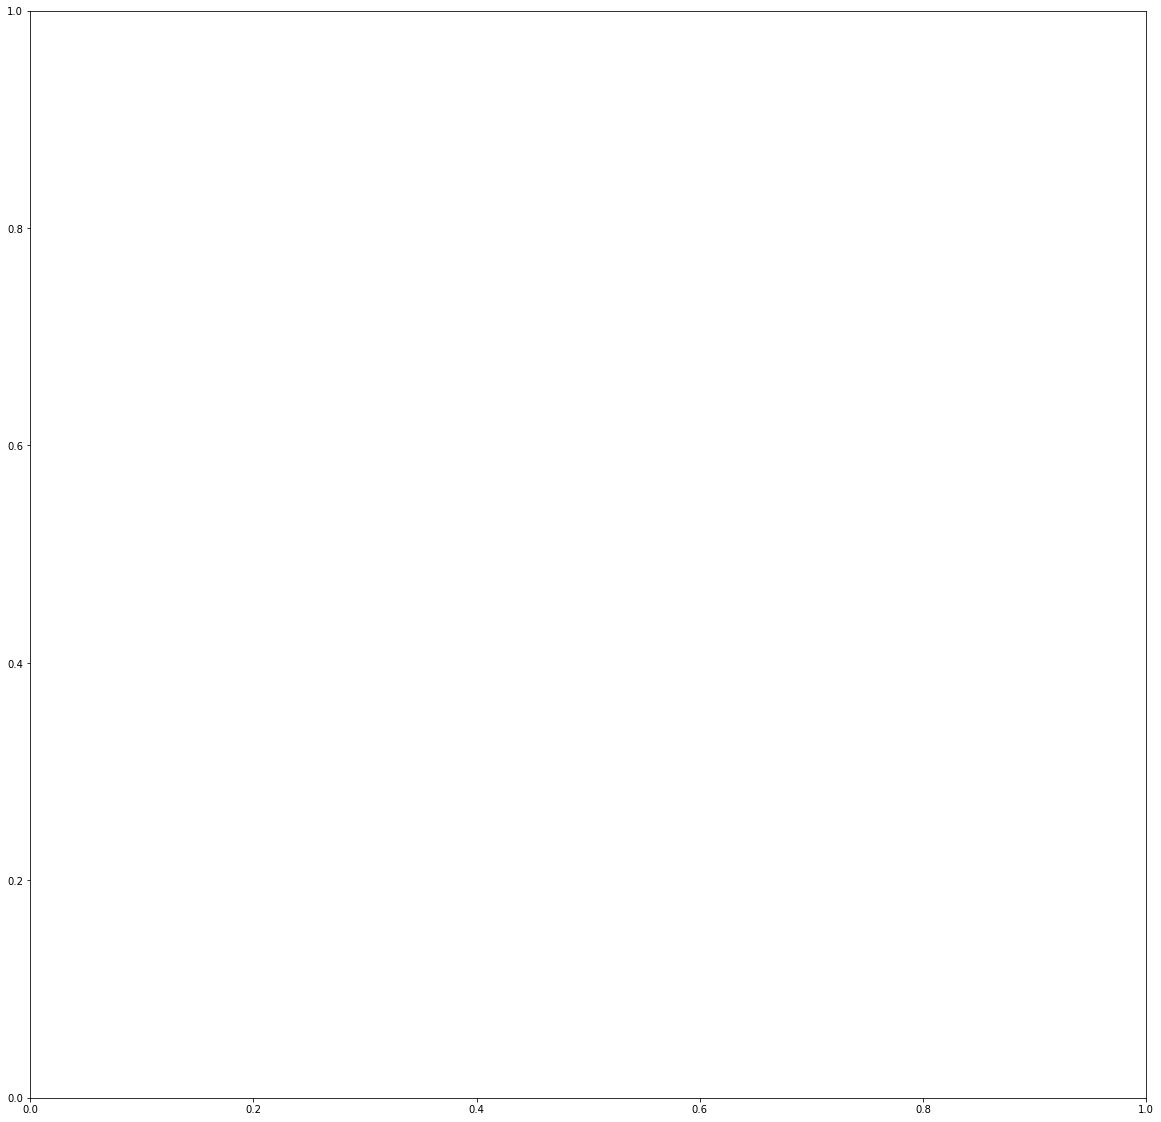

In [13]:
fig, ax = plt.subplots(figsize = (20,20))

ax.imshow(image.data, cmap = 'Greys', origin = 'lower', vmin = 100, vmax = 5000)
apertures.plot(color = 'c', lw=2.5, alpha = 1)
ax.xlabel('HI')

In [349]:
annulus_aperture = photutils.CircularAnnulus(positions = (mine['xcentroid'], mine['ycentroid']), r_in = 11, r_out = 20)
circle_aperture = photutils.CircularAperture(positions = (mine['xcentroid'], mine['ycentroid']), r = 3)
table = photutils.aperture_photometry(image.data, circle_aperture, method = 'exact')
table['sky_bkg'] = median_sigclip * circle_aperture.area
table

id,xcenter,ycenter,aperture_sum,sky_bkg
,pix,pix,,
int64,float64,float64,float64,float64
1,323.1551395775673,200.88396324119472,685194.1263101604,59800.21616108171


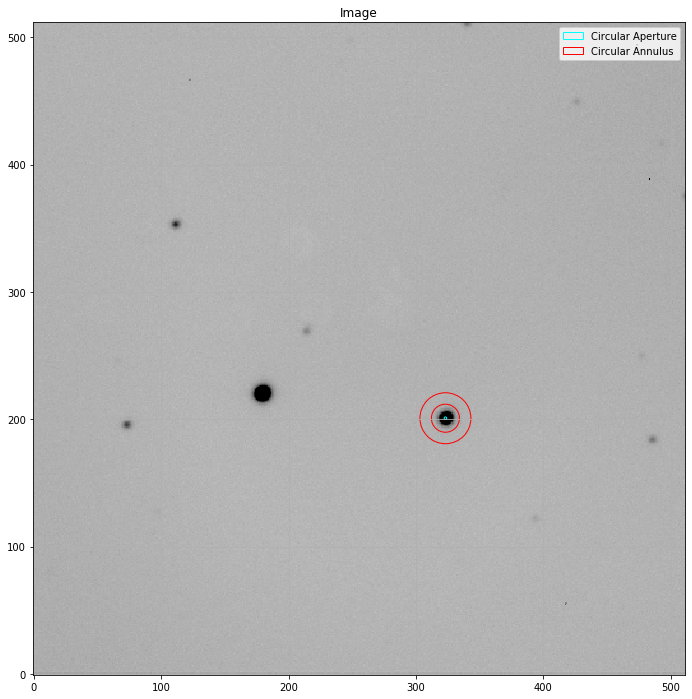

In [342]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(image.data, cmap='Greys', origin='lower', vmin=100, vmax=5000)
circle_aperture.plot(color='cyan', label = 'Circular Aperture')
annulus_aperture.plot(color= 'r', label='Circular Annulus')
plt.title('Image')
plt.grid(b = None)
plt.legend();

In [345]:
noise = 4 * u.adu
gain = 1.14 * (u.electron / u.adu)
n_pix = 161.13
total_background = median_sigclip * circle_aperture.area
N_star = (photon_table['aperture_sum'][0] - median_sigclip*u.adu)
bkg = median_sigclip
N_star

<Quantity 3798590.30035747 adu>

In [288]:
mag1 = -2.5 * np.log(109152.53/30)
mag2 = -2.5 * np.log(380531/30)
mag3 = -2.5 * np.log(685194.1263101604/30)
mag4 = -2.5 * np.log(935587.17/30)
mag5 = -2.5 * np.log(1126394.7/30)
mag6 = -2.5 * np.log(1276725.5/30)
mag7 = -2.5 * np.log(1408060/30)
mag8 = -2.5 * np.log(1534325.3/30)
mag9 = -2.5 * np.log(1663269.9/30)
mag10 = -2.5 * np.log(1799065.2/30)
mag11 = -2.5 * np.log(1944621.9/30)
mag12 = -2.5 * np.log(2101458.3/30)
mag13 = -2.5 * np.log(2269874.7/30)
mag14 = -2.5 * np.log(2450017.9/30)
mag15 = -2.5 * np.log(2643064.2/30)
mag16 = -2.5 * np.log(2848447.5/30)
mag17 = -2.5 * np.log(3067072.6/30)
mag18 = -2.5 * np.log(3297976.5/30)
mag19 = -2.5 * np.log(3541541/30)
mag20 = -2.5 * np.log(3798590.3/30)


instrumental = [mag1, mag2, mag3, mag4, mag5, mag6, mag7, mag8, mag9, mag10, mag11, mag12, mag13, mag14, mag15, mag16, mag17, mag18, mag19, mag20]

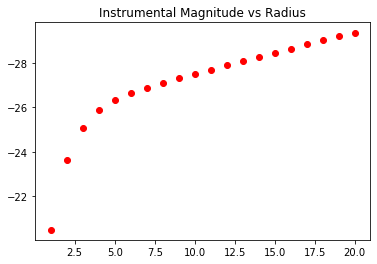

In [333]:
fig, ax = plt.subplots()
plt.scatter(radii, instrumental, color = 'r')
ax.invert_yaxis()
ax.set_title('Instrumental Magnitude vs Radius');

In [127]:
bkg = aperture_photometry(image, annulus_aperture, method = 'exact')
N_sky = bkg['aperture_sum']
N_sky

<Quantity [1853968.35957989] adu>

In [102]:
fluxes = photon_table['aperture_sum']-avg_bkg

In [103]:
fluxes

<Quantity [ 697120.4352954 ,  724855.40612508, 1799064.98548061,
           3080992.81372473, 3080350.43665076,  730596.34827443,
            694888.16512175,  655491.72897761,  404399.22913829] adu>

In [350]:
SNR1 = (1.14 * 111267.52627022681) / (np.sqrt(1.14 * 111267 + (np.pi * 1**2) * 1.14 * 1853968 + (np.pi * 1**2) * 4))
SNR2 = (1.14 * 382646.00106758875) / (np.sqrt(1.14 * 382646 + (np.pi * 2**2) * 1.14 * 1853968 + (np.pi * 2**2) * 4))
SNR3 = (1.14 * 685194.1263101604) / (np.sqrt(1.14 * 685194 + (np.pi * 3**2) * 1.14 * 1853968 + (np.pi * 3**2) * 4))
SNR4 = (1.14 * 935587) / (np.sqrt(1.14 * 937702.1658265967 + (np.pi * 4**2) * 1.14 * 1853968 + (np.pi * 4**2) * 4))
SNR5 = (1.14 * 1126394) / (np.sqrt(1.14 * 1128509.6811059527 + (np.pi * 5**2) * 1.14 * 1853968 + (np.pi * 5**2) * 4))
SNR6 = (1.14 * 1276725) / (np.sqrt(1.14 * 1278840.525210286 + (np.pi * 6**2) * 1.14 * 1853968 + (np.pi * 6**2) * 4))
SNR7 = (1.14 * 1408060) / (np.sqrt(1.14 * 1410174.9520450658 + (np.pi * 7**2) * 1.14 * 1853968 + (np.pi * 7**2) * 4))
SNR8 = (1.14 * 1534325) / (np.sqrt(1.14 * 1536440.2578772502 + (np.pi * 8**2) * 1.14 * 1853968 + (np.pi * 8**2) * 4))
SNR9 = (1.14 * 1663269) / (np.sqrt(1.14 * 1665384.929527538 + (np.pi * 9**2) * 1.14 * 1853968 + (np.pi * 9**2) * 4))
SNR10 = (1.14 * 1799065) / (np.sqrt(1.14 * 1801180.1699161911 + (np.pi * 10**2) * 1.14 * 1853968 + (np.pi * 10**2) * 4))
SNR11 = (1.14 * 1944621) / (np.sqrt(1.14 * 1946736.9407775765 + (np.pi * 11**2) * 1.14 * 1853968 + (np.pi * 11**2) * 4))
SNR12 = (1.14 * 2101458) / (np.sqrt(1.14 * 2103573.2874412565 + (np.pi * 12**2) * 1.14 * 1853968 + (np.pi * 12**2) * 4))
SNR13 = (1.14 * 2269874) / (np.sqrt(1.14 * 2271989.6525153294 + (np.pi * 13**2) * 1.14 * 1853968 + (np.pi * 13**2) * 4))
SNR14 = (1.14 * 2450017) / (np.sqrt(1.14 * 2452132.9301764187 + (np.pi * 14**2) * 1.14 * 1853968 + (np.pi * 14**2) * 4))
SNR15 = (1.14 * 2643064) / (np.sqrt(1.14 * 2645179.2401604704 + (np.pi * 15**2) * 1.14 * 1853968 + (np.pi * 15**2) * 4))
SNR16 = (1.14 * 2848447) / (np.sqrt(1.14 * 2850562.530682372 + (np.pi * 16**2) * 1.14 * 1853968 + (np.pi * 16**2) * 4))
SNR17 = (1.14 * 3067072) / (np.sqrt(1.14 * 3069187.6248296737 + (np.pi * 17**2) * 1.14 * 1853968 + (np.pi * 17**2) * 4))
SNR18 = (1.14 * 3297976) / (np.sqrt(1.14 * 3300091.4803698156 + (np.pi * 18**2) * 1.14 * 1853968 + (np.pi * 18**2) * 4))
SNR19 = (1.14 * 3541541) / (np.sqrt(1.14 * 3543655.9959700108 + (np.pi * 19**2) * 1.14 * 1853968 + (np.pi * 19**2) * 4))
SNR20 = (1.14 * 3798590) / (np.sqrt(1.14 * 3800705.300357465 + (np.pi * 20**2) * 1.14 * 1853968 + (np.pi * 20**2) * 4))

In [351]:
ratio = [SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8,SNR9,SNR10,SNR11,SNR12,SNR13,SNR14,SNR15,SNR16,SNR17,SNR18,SNR19,SNR20]

radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

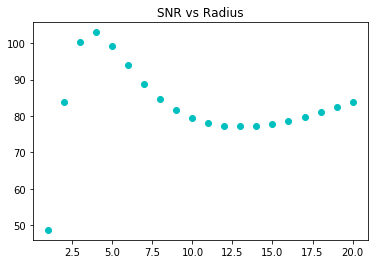

In [352]:
fig, ax = plt.subplots()
plt.scatter(radii, ratio, color = 'c')
ax.set_title('SNR vs Radius');

Process and Enterpretation

I chose the file object_032.fits from Canvas. First we need to import all the packages we need, mainly astropy, numpy, and photutils. Next we have to read in the file. To read in fits files in python I prefer to use CCDData.read from astropy to read in the data. Next we will use phoututils.detection.daostarfinder to detect any 'sources' in our field, where we use scipy to determine the standard deviation value for our image, use that standard deviation to set a reasonable threshold. I got 9 sources. I chose the bright star on the right since it is so bright, but not saturated. Next I used photutils.aperture to draw a circular aperture around that star to determine the adu count for that region. Next we need another aperture to determine the sky background. For this we will use a circular annnulus, centered around the star. To get these coordinates we simply need to run the photutils.aperture_photometry then grab the coordinates we deisre. No we have a flux for both the star and the sky background, in adus. Our goal is to show on a plot how the instrumental magnitude changes with a changing aperture radius and how the signal-to-noise ratio chabges as circular aperture radius changes. As you can see I did not use a for loop, instead I did it the long way: I calculated 20 different SNRs as well as 20 instrumental magnitudes, then made those into arrays. For all 20 points, the aperture's radius changes by 1, starting at a radius of 1 pixel, all the way to 20 pixels. We were given the gain, noise, and the equations needed to determine the SNR and instr-magnitude. I plugged and chugged my way to the 20 values for each. Once you have your values, and they are all put into their respective arrays, we can plot to check our answers. Plot the instrumental magnitudes vs radius. The image for this plot is seen directly above this text box. You see the SNR peaks very early then begins to receed before increasing agian. This makes sense since you don't even encompass the whole star until about an aperture radius of ~ 5 pixels, at which point adding anymore to the radius will increase the noise, leading to a decrease in SNR. For instrumental magnitude, seen higher up, we see that the magnitude stops increasing as drastically at the point radius = ~ 5 pixels, like in the previous problem. Again this makes sense because magnitude will only increase (smaller number) as we are letting more and more light in. Furtermore, the change in the slope around 5 lines up with our knowledge of magnitudes abd flux! Done.

NOTE: The following was just from me messing aroud with matplotlib and photutils.

In [68]:
annulus_masks = annulus_aperture.to_mask(method='center')

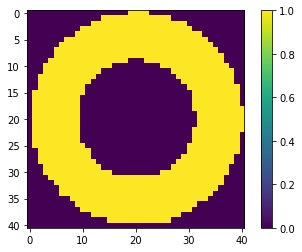

In [71]:
plt.imshow(annulus_masks)
plt.colorbar()

In [73]:
annulus_data = annulus_masks.multiply(image.data)

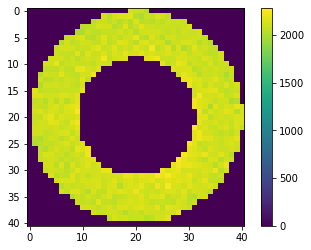

In [75]:
data = make_100gaussians_image()
plt.imshow(annulus_data)
plt.colorbar()

In [76]:
mask = annulus_masks.data
annulus_data_1d = annulus_data[mask > 0]
annulus_data_1d.shape

(875,)

In [77]:
from astropy.stats import sigma_clipped_stats
_, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
print(median_sigclip)

2115.0


In [80]:
total_background = median_sigclip * circle_aperture.area

In [81]:
total_background

349249.8735518731

In [6]:
def office_hour_queue(student_dict, time_began):
    '''
    Takes a dictionary mapping student names to their arrival time and an
    office hour starting time. The function returns a list of student names
    sorted by their arrival time. If students have the same arrival time,
    ties should be broken by alphabetical order. Students that arrived
    60 minutes or more after office hours started should not be included in
    the output.

    Arguments:
      student_dict: a dictionary mapping string student names to 24-hour
                    arrival time strings
      time_began: a string representing the starting time of office hours

    Returns: a list of student names
    '''
    replace_d = {}
    for i in student_dict:
        re = student_dict[i].replace(':', '.')
        replace_d[i] = float(re)


    room = sorted(replace_d, key=lambda x: (replace_d[x], x))

    final = {}
    for i in room:
        for k in replace_d.keys():
            if replace_d[i] == replace_d[k] and replace_d[i] - float(time_began.replace(':', '.')) <= 0.99:
                final[i] = student_dict[i]

    ans = []
    for i in final.keys():
        ans.append(i)
    return ans
    
    
    
times1 = {'Elizabeth': '9:45', 'Jane': '9:30', 'Caroline': '10:30',
              'Lydia': '10:20', 'Kitty': '10:20', 'Mary': '9:35'}

In [7]:
office_hour_queue(times1, '9:30')

['Jane', 'Mary', 'Elizabeth', 'Kitty', 'Lydia']

In [8]:
office_hour_queue({'Mia': '15:00', 'Maya': '15:00'}, '15:00')

['Maya', 'Mia']